# Neural networks in Python using Scikit Learn

* We will be using an implementation of Multilayer Perceptron from scikit-learn
* Documentation: http://scikit-learn.org/stable/modules/neural_networks_supervised.html
* This implementation consists of two classes:
 * `MLPRegressor` for regression
 * `MLPClassifier` for classification

In [40]:
from sklearn.neural_network.multilayer_perceptron import MLPRegressor, MLPClassifier

## Regression with neural networks

In [41]:
# In the assignment, the data loading function is provided
# Here, we use the example dataset that comes with scikit learn
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [42]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [43]:
from enum import Enum
Feature = Enum('Feature', 'CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT MEDV', start=0)

Text(0,0.5,"Median value of owner-occupied homes in $1000's")

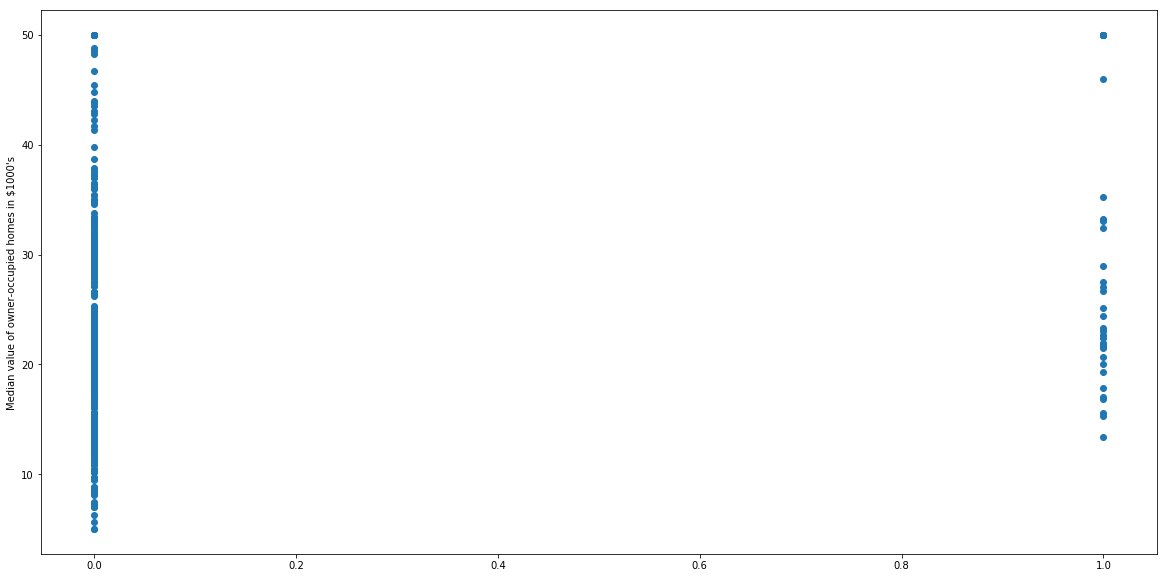

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

nox_concentrations = boston.data[:, Feature.CHAS.value]
house_prices = boston.target

ax = plt.subplot()
ax.scatter(nox_concentrations, house_prices)
# ax.set_xlabel("Nitric oxides concentration (parts per 10 million)")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")

Text(0,0.5,"Median value of owner-occupied homes in $1000's")

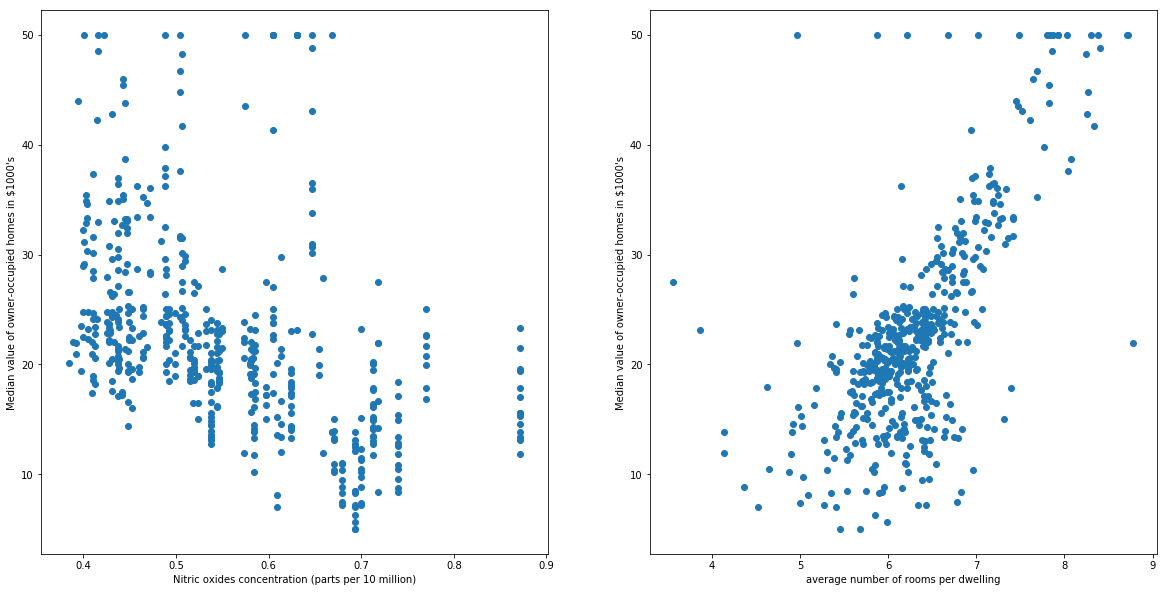

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

nox_concentrations = boston.data[:, Feature.NOX.value]
house_prices = boston.target

ax = plt.subplot(121)
ax.scatter(nox_concentrations, house_prices)
ax.set_xlabel("Nitric oxides concentration (parts per 10 million)")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")

rooms_per_dwelling = boston.data[:, Feature.RM.value]
house_prices = boston.target

ax = plt.subplot(122)
ax.scatter(rooms_per_dwelling, house_prices)
ax.set_xlabel("average number of rooms per dwelling")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")

In [46]:
# In the assignment, the data is already split up
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array([rooms_per_dwelling, nox_concentrations]).T
y = house_prices
print("Dataset shape (X, y)     :", X.shape, y.shape)
## Split the data into a testing and training set (20% of the data for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Training set shape (X, y):", X_train.shape, y_train.shape)

Dataset shape (X, y)     : (506, 2) (506,)
Training set shape (X, y): (404, 2) (404,)


In [47]:
## Initialize the neural network
n_hidden_neurons = 20
nn = MLPRegressor(activation='logistic', solver='lbfgs', # max_iter=5000,
                      hidden_layer_sizes=(n_hidden_neurons,), random_state=1)
nn  # Important parameters -- activation, solver, alpha, hidden_layer_sizes, max_iter, random_state, warm_start

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [48]:
## Train the network
nn.fit(X_train, y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [49]:
## Calculate and print the MSE
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, nn.predict(X_train))
test_mse = mean_squared_error(y_test, nn.predict(X_test))
print("Training MSE:", train_mse)
print("Testing MSE: ", test_mse)

Training MSE: 30.36074767072883
Testing MSE:  25.3825788268893


In [50]:
## Predict the house prices for the entire data set
predictions = nn.predict(X)

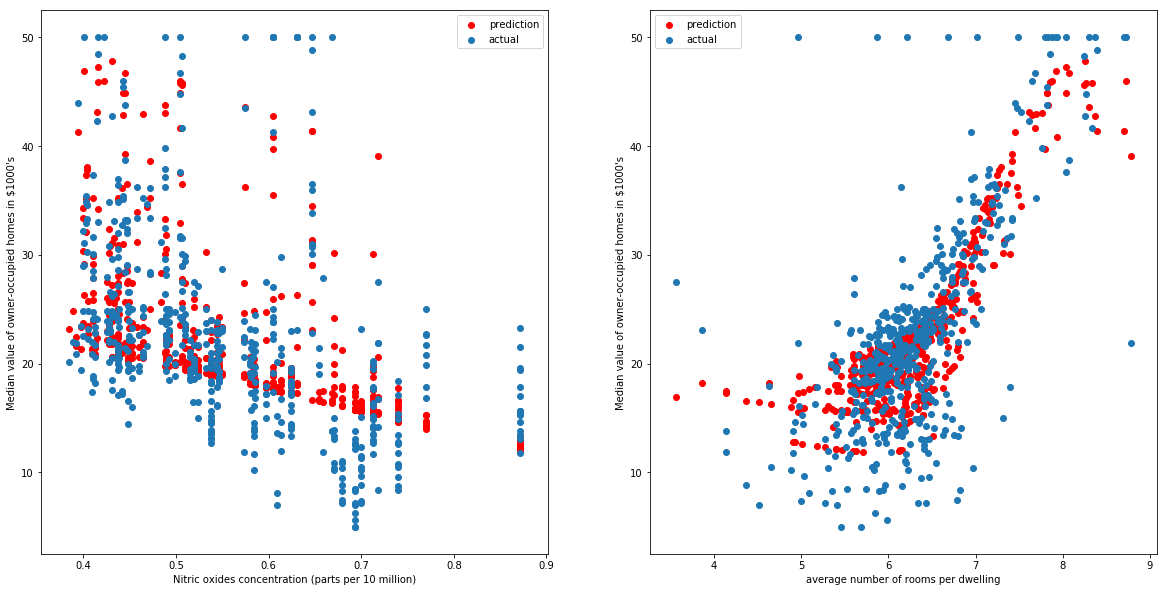

In [51]:
## Plot network predictions and actual values
plt.figure(figsize=(20,10))

house_prices_prediction = predictions
house_prices_actual = boston.target

nox_concentrations = boston.data[:, Feature.NOX.value]

ax = plt.subplot(121)
ax.scatter(nox_concentrations, house_prices_prediction, color='r', label='prediction')
ax.scatter(nox_concentrations, house_prices_actual, label='actual')
ax.set_xlabel("Nitric oxides concentration (parts per 10 million)")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
plt.legend()

rooms_per_dwelling = boston.data[:, Feature.RM.value]

ax = plt.subplot(122)
ax.scatter(rooms_per_dwelling, house_prices_prediction, color='r', label='prediction')
ax.scatter(rooms_per_dwelling, house_prices_actual, label='actual')

ax.set_xlabel("average number of rooms per dwelling")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
plt.legend()

### Experiment with parameters

Training MSE: 30.622434657624652
Testing MSE:  26.61489882480407


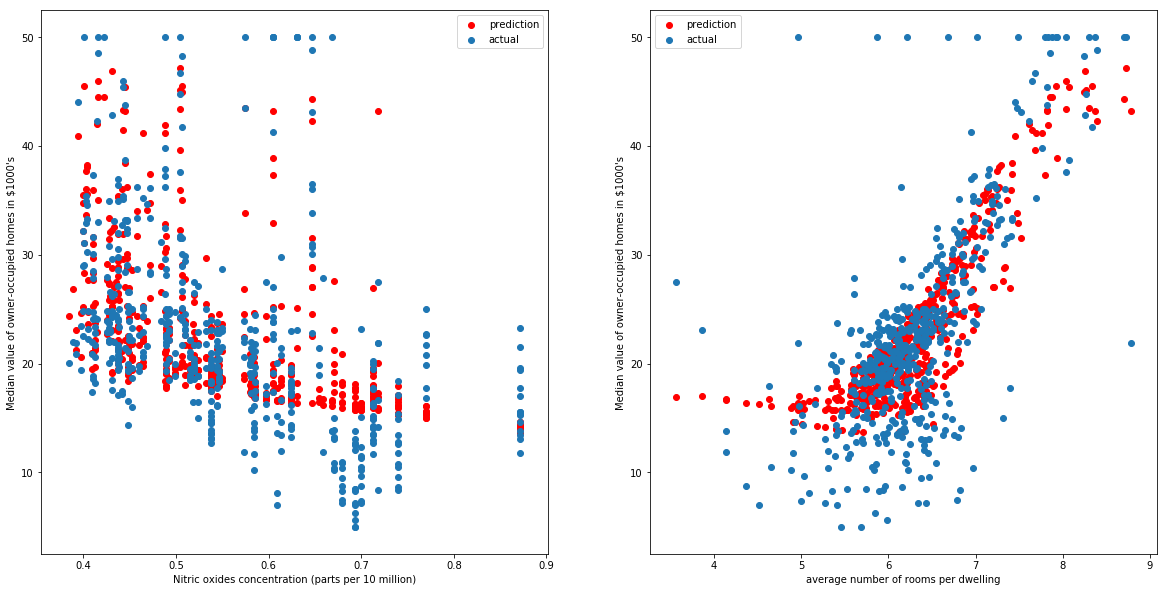

In [52]:
## Initialize the neural network
n_hidden_neurons = 4 # 20
nn = MLPRegressor(activation='logistic', solver='lbfgs', max_iter=200,
                      hidden_layer_sizes=(n_hidden_neurons,), random_state=1)

## Train the network
nn.fit(X_train, y_train)

## Calculate and print the MSE
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, nn.predict(X_train))
test_mse = mean_squared_error(y_test, nn.predict(X_test))
print("Training MSE:", train_mse)
print("Testing MSE: ", test_mse)

## Predict the house prices for the entire data set
predictions = nn.predict(X)

## Plot network predictions and actual values
plt.figure(figsize=(20,10))

house_prices_prediction = predictions
house_prices_actual = boston.target

nox_concentrations = boston.data[:, Feature.NOX.value]

ax = plt.subplot(121)
ax.scatter(nox_concentrations, house_prices_prediction, color='r', label='prediction')
ax.scatter(nox_concentrations, house_prices_actual, label='actual')
ax.set_xlabel("Nitric oxides concentration (parts per 10 million)")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
plt.legend()

rooms_per_dwelling = boston.data[:, Feature.RM.value]

ax = plt.subplot(122)
ax.scatter(rooms_per_dwelling, house_prices_prediction, color='r', label='prediction')
ax.scatter(rooms_per_dwelling, house_prices_actual, label='actual')

ax.set_xlabel("average number of rooms per dwelling")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
plt.legend()

## Warm start

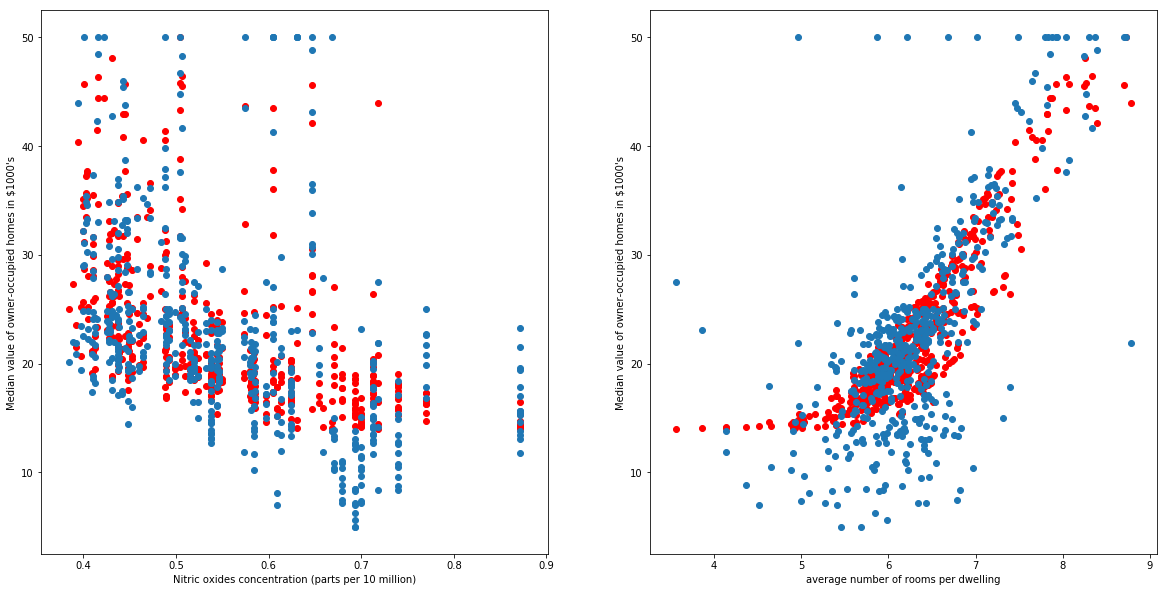

In [53]:
from IPython import display
from sklearn.metrics import mean_squared_error


## Initialize the neural network
n_hidden_neurons = 20
max_iterations = 1500
nn = MLPRegressor(activation='logistic', solver='lbfgs',
                      hidden_layer_sizes=(n_hidden_neurons,), random_state=1, warm_start=True, max_iter=1)

fig = plt.figure(figsize=(20,10))
for i in range(max_iterations):
    ## Train the network
    nn.fit(X_train, y_train)
    
    if i % 50 == 0 or i < 10:

        ## Calculate and print the MSE
        
        train_mse = mean_squared_error(y_train, nn.predict(X_train))
        test_mse = mean_squared_error(y_test, nn.predict(X_test))
        print("Iteration:", i)
        print("Training MSE:", train_mse)
        print("Testing MSE: ", test_mse)

        ## Predict the house prices for the entire data set
        predictions = nn.predict(X)

        ## Plot network predictions and actual values
        display.clear_output(wait=True)
        
        house_prices_prediction = predictions
        house_prices_actual = boston.target

        nox_concentrations = boston.data[:, Feature.NOX.value]

        ax = plt.subplot(121)
        plt.gca().cla() 
        ax.scatter(nox_concentrations, house_prices_prediction, color='r', label='prediction')
        ax.scatter(nox_concentrations, house_prices_actual, label='actual')
        ax.set_xlabel("Nitric oxides concentration (parts per 10 million)")
        ax.set_ylabel("Median value of owner-occupied homes in $1000's")

        rooms_per_dwelling = boston.data[:, Feature.RM.value]

        ax = plt.subplot(122)
        plt.gca().cla() 
        ax.scatter(rooms_per_dwelling, house_prices_prediction, color='r', label='prediction')
        ax.scatter(rooms_per_dwelling, house_prices_actual, label='actual')

        ax.set_xlabel("average number of rooms per dwelling")
        ax.set_ylabel("Median value of owner-occupied homes in $1000's")
        
        display.display(plt.gcf())
display.clear_output(wait=True)

## Classification with Neural Networks

In [54]:
# from sklearn.datasets import load_digits
# digits = load_digits()
# IMAGE_DIM = (8, 8)
# X = digits.data / 16.

from sklearn.datasets import fetch_mldata
digits = fetch_mldata('MNIST original')
IMAGE_DIM = (28, 28)
X = digits.data / 255.

y = digits.target

print(digits.data.shape)
digits.data[5].shape

(70000, 784)


(784,)

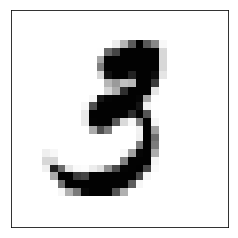

In [55]:
## Show a random digit

fig, ax = plt.subplots()
ax.imshow(digits.data[np.random.randint(50000)].reshape(*IMAGE_DIM), interpolation='none', cmap='Greys')
ax.set_xticks([])
_ = ax.set_yticks([])

In [56]:
from sklearn.cross_validation import train_test_split
import numpy as np

print("Dataset shape (X, y)     :", X.shape, y.shape)
## Split the data into a testing and training set (20% of the data for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Training set shape (X, y):", X_train.shape, y_train.shape)

Dataset shape (X, y)     : (70000, 784) (70000,)
Training set shape (X, y): (56000, 784) (56000,)


In [57]:
## Initialize the neural network
n_hidden_neurons = 100 # 25
nn = MLPClassifier(activation='logistic', solver='lbfgs', 
                   # max_iter=5000,
                   early_stopping=True,
                   hidden_layer_sizes=(20, 100), alpha=0.1)

## Train the network
nn.fit(X_train, y_train)

## Calculate and print the loss (log-loss aka cross-entropy error)
from sklearn.metrics import log_loss, accuracy_score
train_loss = log_loss(y_train, nn.predict_proba(X_train), labels=range(10))
test_loss = log_loss(y_test, nn.predict_proba(X_test), labels=range(10))
print("Training Loss:", train_loss)
print("Testing Loss: ", test_loss)

test_accuracy = accuracy_score(y_test, nn.predict(X_test))
print("Test accuracy: ", test_accuracy)

Training Loss: 0.07149432737267086
Testing Loss:  0.16486575063958805
Test accuracy:  0.9547857142857142


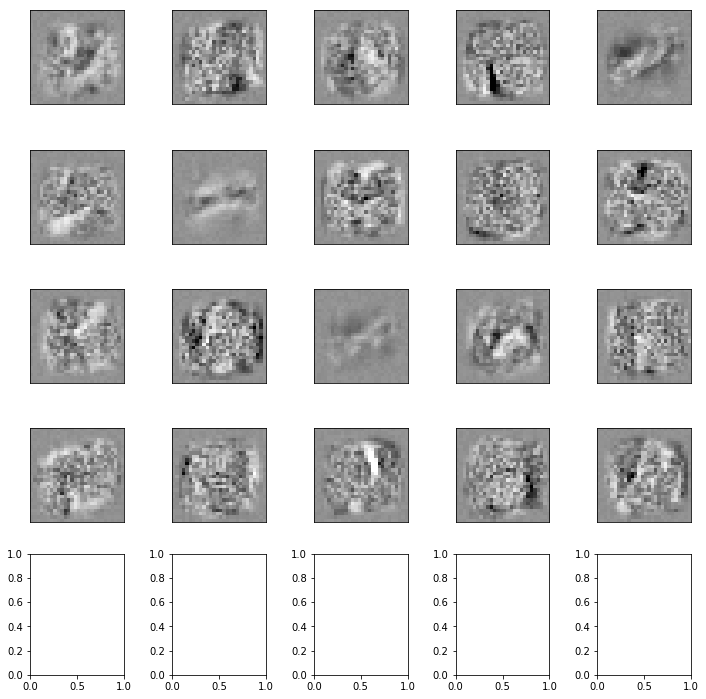

In [58]:
hidden_layer_weights = nn.coefs_[0]

n_neurons_to_plot = 25
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.flatten()

for i, hidden_neuron_num in enumerate(range(hidden_layer_weights.shape[1])[:n_neurons_to_plot]):
        ax = axs[i]
        vmin, vmax = hidden_layer_weights.min(), hidden_layer_weights.max()
        ax.imshow(hidden_layer_weights[:, hidden_neuron_num].reshape(*IMAGE_DIM).T, cmap='Greys',
                  vmin=.5 * vmin, vmax=.5 * vmax,
                  interpolation='none')
        ax.set_xticks(())
        ax.set_yticks(())
plt.tight_layout()

Experiment with values of alpha and n_hidden_neurons